# Notebook pour run le model de word to vec 

C'est globalement un peu long de le load à chaque fois, autant le garder en mémoire

In [2]:
# Pour debug

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


In [3]:
# Pour load le modèle
# Using CBOW (continuous bag of words) model

import gensim as gm
import os

print(os.getcwd())

wv = gm.models.KeyedVectors.load_word2vec_format("../../data/pre-trained-models/word2vec-google-news-300/GoogleNews-vectors-negative300.bin", binary=True)


2023-03-15 15:04:40,846 : INFO : loading projection weights from ../../data/pre-trained-models/word2vec-google-news-300/GoogleNews-vectors-negative300.bin


/home/desir/Code/PSC-Stats/src/gensim


: 

: 

## Debut de l'analyse

In [4]:
king = wv['king']
# size of vector for each word
print(len(king))

300


In [7]:
# Reduce to 2D  

from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling

import matplotlib.pyplot as plt
import random

def reduce_dimensions(wv):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(wv.vectors)
    labels = np.asarray(wv.index_to_key)  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

# Select a subset of 1000 of the words to work with

keys = random.sample(wv., 10)
x_vals, y_vals, labels = reduce_dimensions(new_wv)

TypeError: 'slice' object is not iterable

: 

### Vizualise Word Embedding

In [8]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling
import matplotlib.pyplot as plt
import random


def reduce_dimensions(wv):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(wv.vectors)
    labels = np.asarray(wv.index_to_key)  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals,from sklearn.cluster import KMeans
import pandas as pd

def plot_embeddings_cluster(M_reduced, word2ind, words):
    '''
    Plot in a 2D-graph the words vectors, highlighting a number n of clusters. We are using the method k-means.

    ## Params:
        M_reduced (numpy matrix of shape (num_corpus_words, dim=2)): co-occurence matrix reduced by reduce_to_k_dim
        word2ind: dictionary mapping each word to its row number in M_reduced 
        words: array of the words vectors we are plotting
    '''
    clf = KMeans(n_clusters= 6) # Modify here the number of clusters
    X = []
    Y= []
    
    for i in range(len(words)):
        k = word2ind[words[i]]
        X.append(M_reduced[k][0])
        Y.append(M_reduced[k][1])
    d= {'X' : X, 'Y' : Y}
    df = pd.DataFrame(data = d)
    clf.fit(df)
    labels = clf.labels_
    colors = ['g.', 'r.', 'b.', 'c.', 'y.', 'm.'] # Modify this array if you use more than 6 clusters (add more colors)
    for i in range(len(df)):
        plt.plot(df.iloc[i,0], df.iloc[i,1], colors[labels[i]], markersize = 10)
        plt.text(df.iloc[i,0], df.iloc[i,1], words[i], fontsize = 9)
    plt.show()
 y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(wv)


def plot_with_matplotlib(x_vals, y_vals, labels):
    

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

plot_with_matplotlib(x_vals, y_vals, labels)

: 

: 

# Entrainement Word2Vec Sur le Corpus

In [1]:
import re
import numpy as np
import nltk as sl
import os
from matplotlib import pyplot as plt

path = os.getcwd()
corpus_path = '/data/corpus/corpus1'
path = path[:path.rfind('/src')]

files = os.listdir(path+corpus_path)



In [10]:

# Define Methods to load files and clean text

def get_txt_from_folder(files):
    # Get all .txt files in list of files
    document_list = []
    for k in range(len(files)):
        if files[k][-4:] == ".txt":
            document_list.append(files[k])
    return document_list


class MyCorpus(object):
    """An interator that yields sentences (lists of str)."""
    def __iter__(self): 
        for doc_path in files:
            print('Process doc : ' + doc_path)
            with open(path+corpus_path+"/"+doc_path, "r") as f:
                text = f.read()
            text = re.sub('[^a-zA-Z]+', ' ', text)
            # remove double space
            text = re.sub(' +', ' ', text)

            # lower case
            text = text.lower()

            # remove stop words
            stop_words = sl.corpus.stopwords.words('english')
            stop_words.append('cid')
            text = [w for w in text.split() if not w in stop_words]

            """
            Pas de stemming histoire de comprendre les résulats un minimum
            # stem words
            stemmer = sl.stem.PorterStemmer()
            result = []
            for w in text:
                if w=='cid' or stemmer.stem(w)=='cid':
                    pass
                result.append(stemmer.stem(w))
            """
            yield text
            


In [11]:
# Load corpus

files = get_txt_from_folder(files)

corpus = MyCorpus()

In [12]:
# Create and Train Model
import gensim.models
# Shit ton of parameters to play with
# min_count, vector_size ... (https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html)
model = gensim.models.Word2Vec(sentences=corpus)

Process doc : ireland_national-strategy-for-higher-education-2030-implementation-plan.txt
Process doc : reportsstategy-statementdepartment-of-education-and-skills-statement-of-strategy-2015-2017.txt
Process doc : moldova_r_seqa-esg-national-action-plan_rm_final_engl.txt
Process doc : czech_republic_higher_education_strategic_plan_2021.txt
Process doc : estonia_youth_work_strategy_2006-2013.txt
Process doc : estonia-higher-education-strategy-2006-2015.txt
Process doc : ireland_statement-of-strategy-2019-2021.txt
Process doc : moldova_education_plan2006-2008.txt
Process doc : bosnia-and-herzegovina_priorities_for_2016_-_2026_higher_education_development_in_bih_eu.txt
Process doc : norway_secondary_education.txt
Process doc : netherlands_quality_in_diversity_strategy.txt
Process doc : armenia_educational_national_plan.txt
Process doc : czech_republic_framework_education_programme_for_basic_education.txt
Process doc : croatia_education_sector_development_plan_2005-2010.txt
Process doc : ir

## Affichage

In [13]:
vec_education = model.wv['education']

for index, word in enumerate(model.wv.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(model.wv.index_to_key)} is {word}")

word #0/4871 is education
word #1/4871 is higher
word #2/4871 is development
word #3/4871 is institutions
word #4/4871 is quality
word #5/4871 is educational
word #6/4871 is system
word #7/4871 is school
word #8/4871 is research
word #9/4871 is national


In [6]:
# remove CID from the model

model.wv.index_to_key.remove('cid')

In [15]:
# get most similar words for a given word

model.wv.most_similar('education')

[('institutions', 0.9003939032554626),
 ('professional', 0.871225118637085),
 ('continuing', 0.8646659255027771),
 ('training', 0.8480916023254395),
 ('vocational', 0.8468225002288818),
 ('service', 0.8412034511566162),
 ('initial', 0.8340394496917725),
 ('technical', 0.826245129108429),
 ('level', 0.8249279856681824),
 ('assuring', 0.8230084776878357)]

In [ ]:
# get the most 

### Operations on Model

In [14]:
# SAVE THE MODEL

model.save(path+'/src/gensim/models/w2v')


In [ ]:
# LOAD THE MODEL 

gensim.models.Word2Vec.load(path+'/src/gensim/models/w2v')

## PCA, Cluster & Vizu

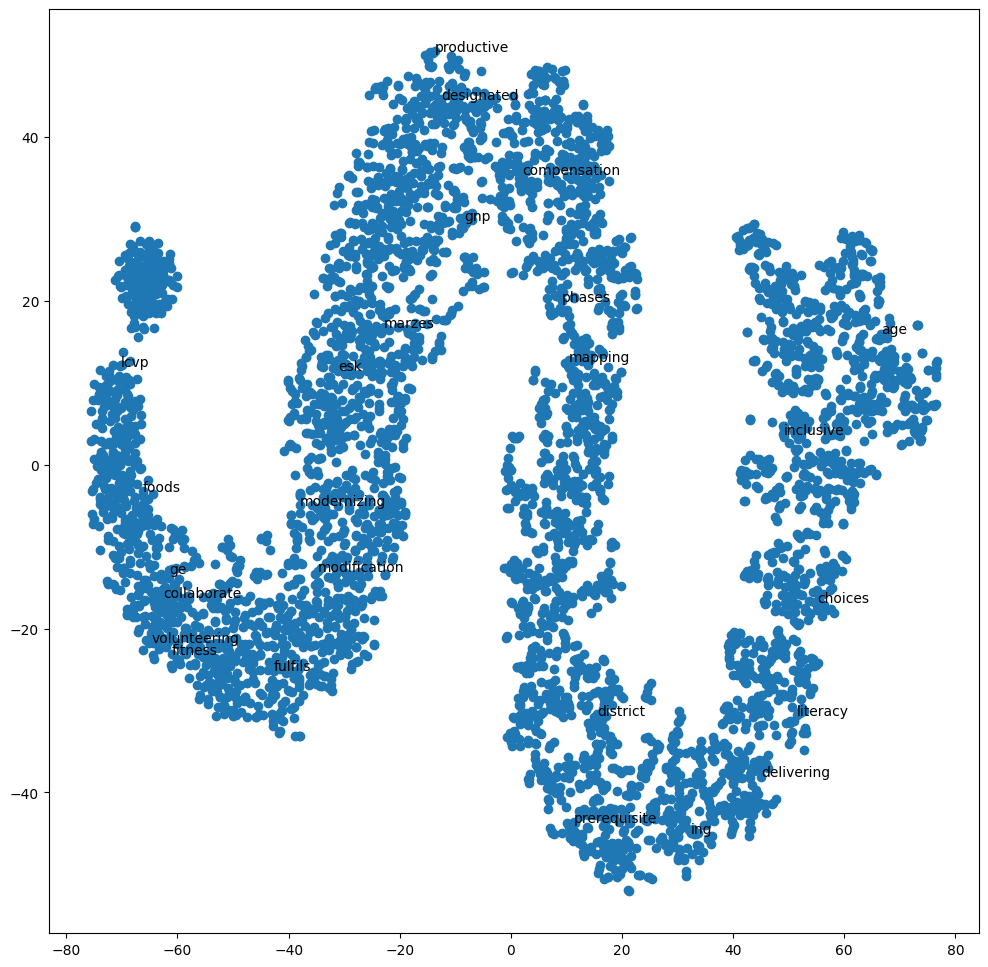

In [18]:
# reduce dimensions for plotting

from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import random

def reduce_dimensions(wv):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(wv.vectors)
    labels = np.asarray(wv.index_to_key)  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels



# plot the data

def plot_with_matplotlib(x_vals, y_vals, labels):
    

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))


In [19]:
x_vals, y_vals, labels = reduce_dimensions(model.wv)


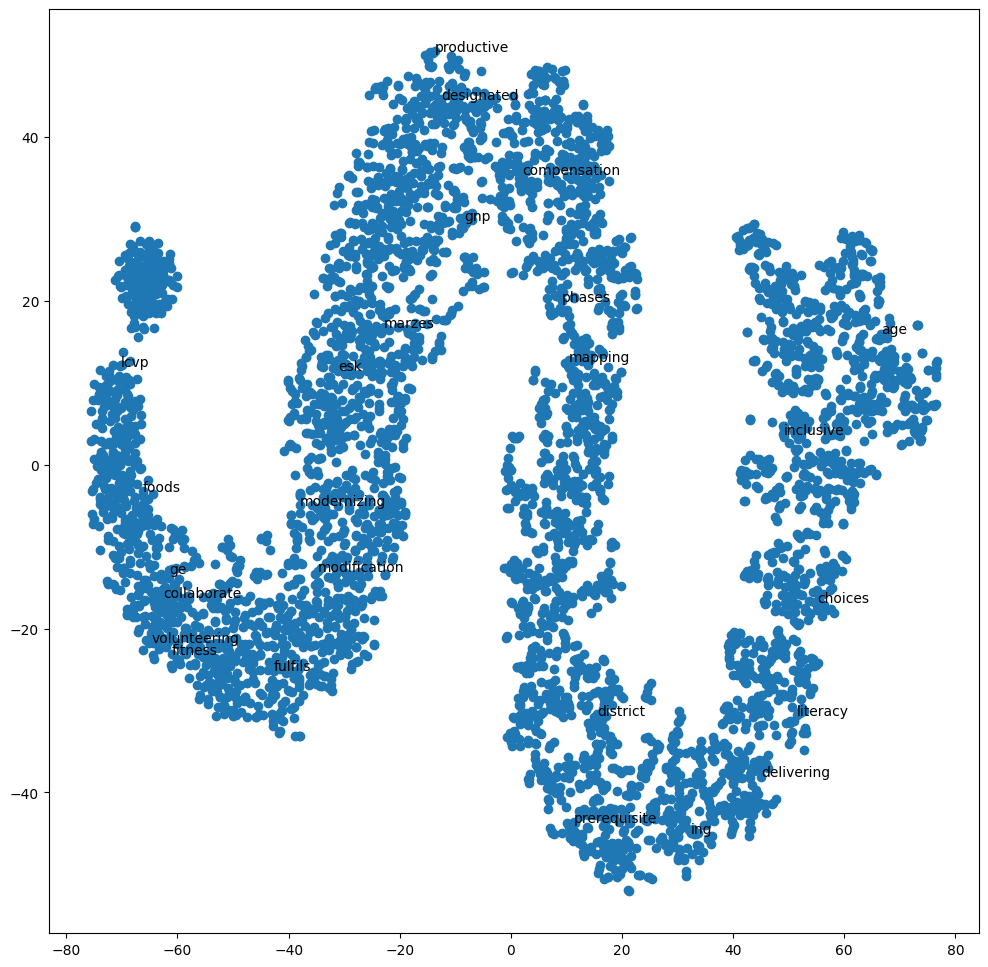

In [20]:
plot_with_matplotlib(x_vals, y_vals, labels)

## Clusterssssssssss

In [26]:
from sklearn.cluster import KMeans
import pandas as pd

In [24]:


def print_clusters(x_vals, y_vals, words, n_clust):

    '''
    Printing the elements of each clusters from plot_embeddings_cluster

    ## Params:
        M_reduced (numpy matrix of shape (num_corpus_words, dim=2)): co-occurence matrix reduced by reduce_to_k_dim
        word2ind: dictionary mapping each word to its row number in M_reduced 
        words: array of the words vectors we are plotting (labels, names of the dots)
        n_clust (int): number of clusters used in plot_embeddings_cluster
    
    '''
    clf = KMeans(n_clusters= n_clust)
    X = x_vals
    Y = y_vals
    
    d= {'X' : X, 'Y' : Y}
    df = pd.DataFrame(data = d)
    clf.fit(df)
    labels = clf.labels_
    
    L = [ [] for i in range(n_clust)]


    plt.figure(figsize = (20,16))
    for i in range(len(df)):
        plt.subplot(n_clust,1,labels[i]+1)
        plt.plot(df.iloc[i,0], df.iloc[i,1])
        plt.text(df.iloc[i,0], df.iloc[i,1], words[i], fontsize = 9)
        L[labels[i]].append(words[i])
    plt.show()


/home/desir/Code/PSC-Stats/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


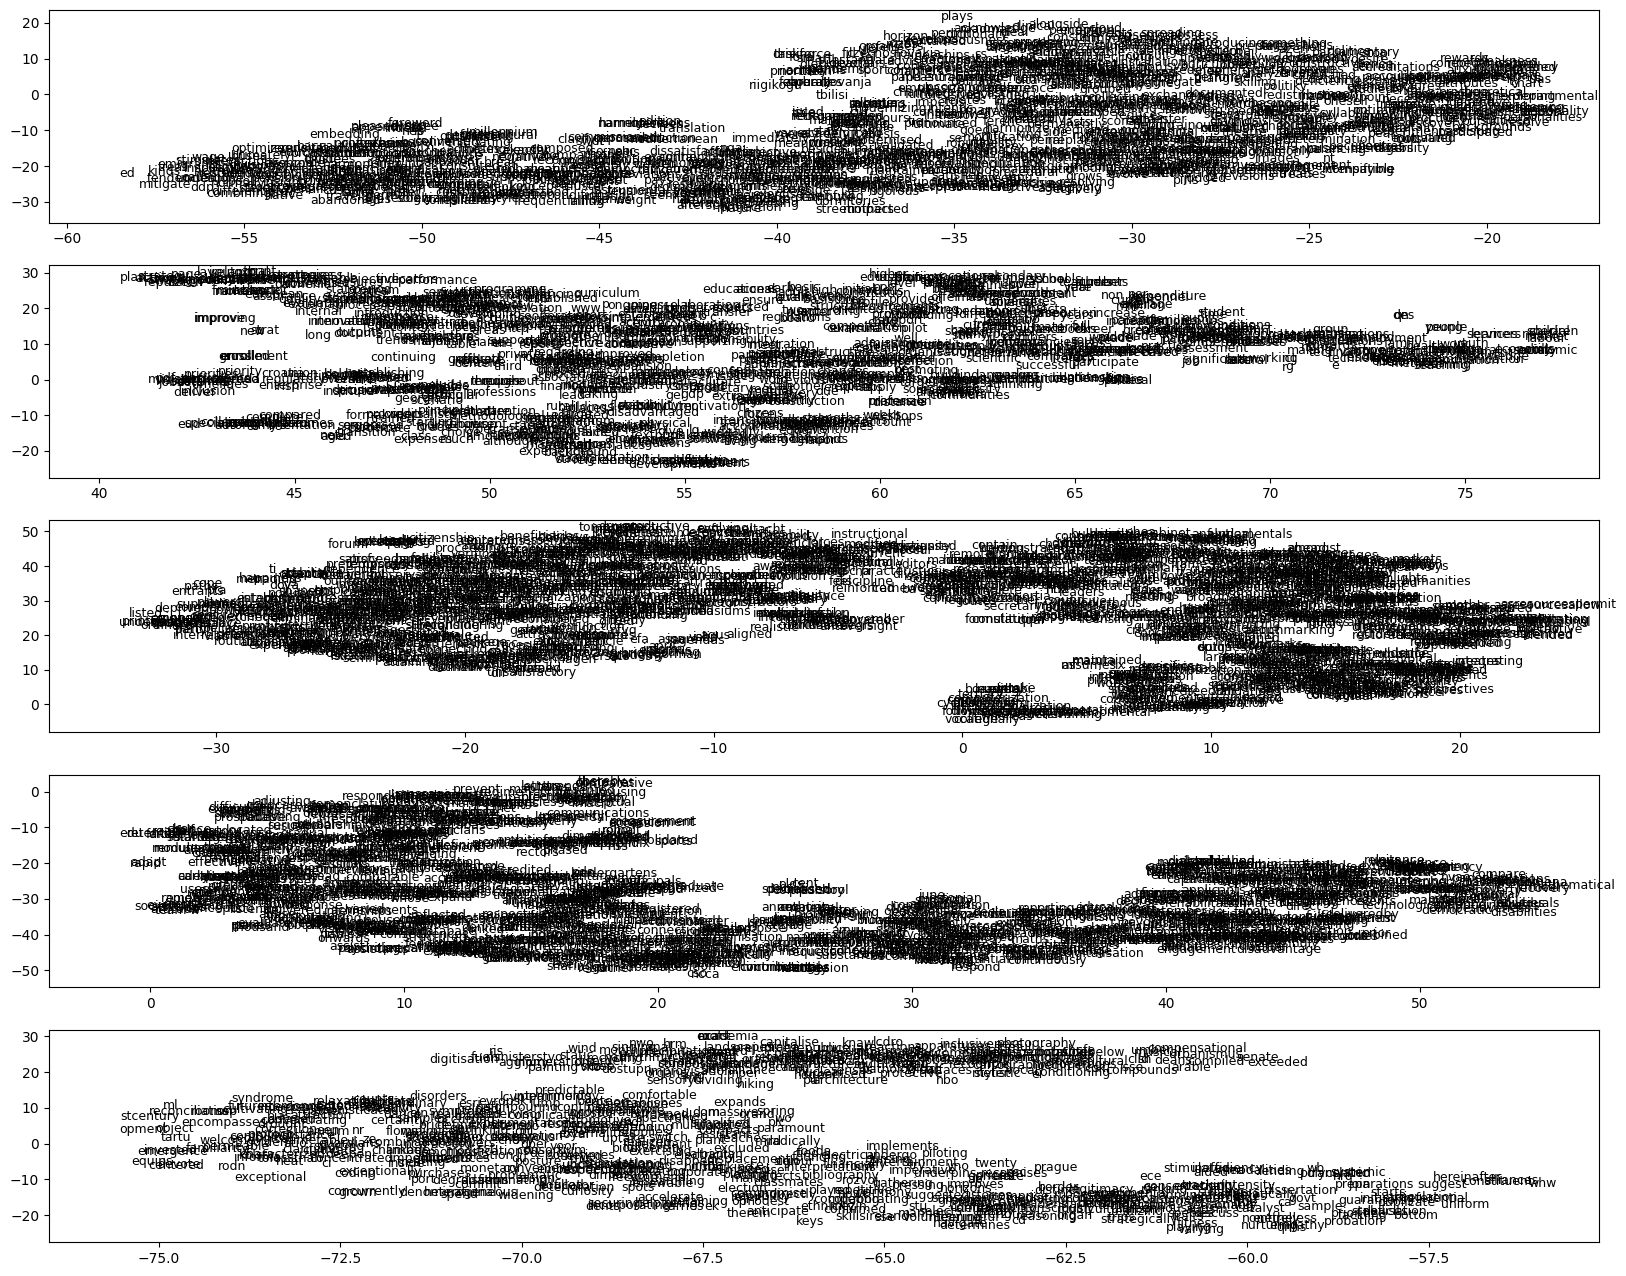

In [25]:
# Use KMeans to cluster the embeddings

print_clusters(x_vals, y_vals, labels, 5)

In [68]:
def plot_embeddings_cluster(x_vals, y_vals, words, n = 6):
    '''
    Plot in a 2D-graph the words vectors, highlighting a number n of clusters. We are using the method k-means.

    ## Params:
        M_reduced (numpy matrix of shape (num_corpus_words, dim=2)): co-occurence matrix reduced by reduce_to_k_dim
        word2ind: dictionary mapping each word to its row number in M_reduced 
        words: array of the words vectors we are plotting
    '''
    clf = KMeans(n_clusters= n) # Modify here the number of clusters
    X = x_vals
    Y = y_vals
    
    d= {'X' : X, 'Y' : Y}
    df = pd.DataFrame(data = d)
    clf.fit(df)
    labels = clf.labels_
    # Generate n random colors

    #colors = [np.random.rand(3,) for i in range(n)]
    #colors = ['g.', 'r.', 'b.', 'c.', 'y.', 'm.'] # Modify this array if you use more than 6 clusters (add more colors)
    # Plot the points using plt.scatter with the colors according to the cluster they belong to
    plt.figure(figsize = (20,16))
    plt.scatter(X, Y, c=labels, cmap='rainbow')

/home/desir/Code/PSC-Stats/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


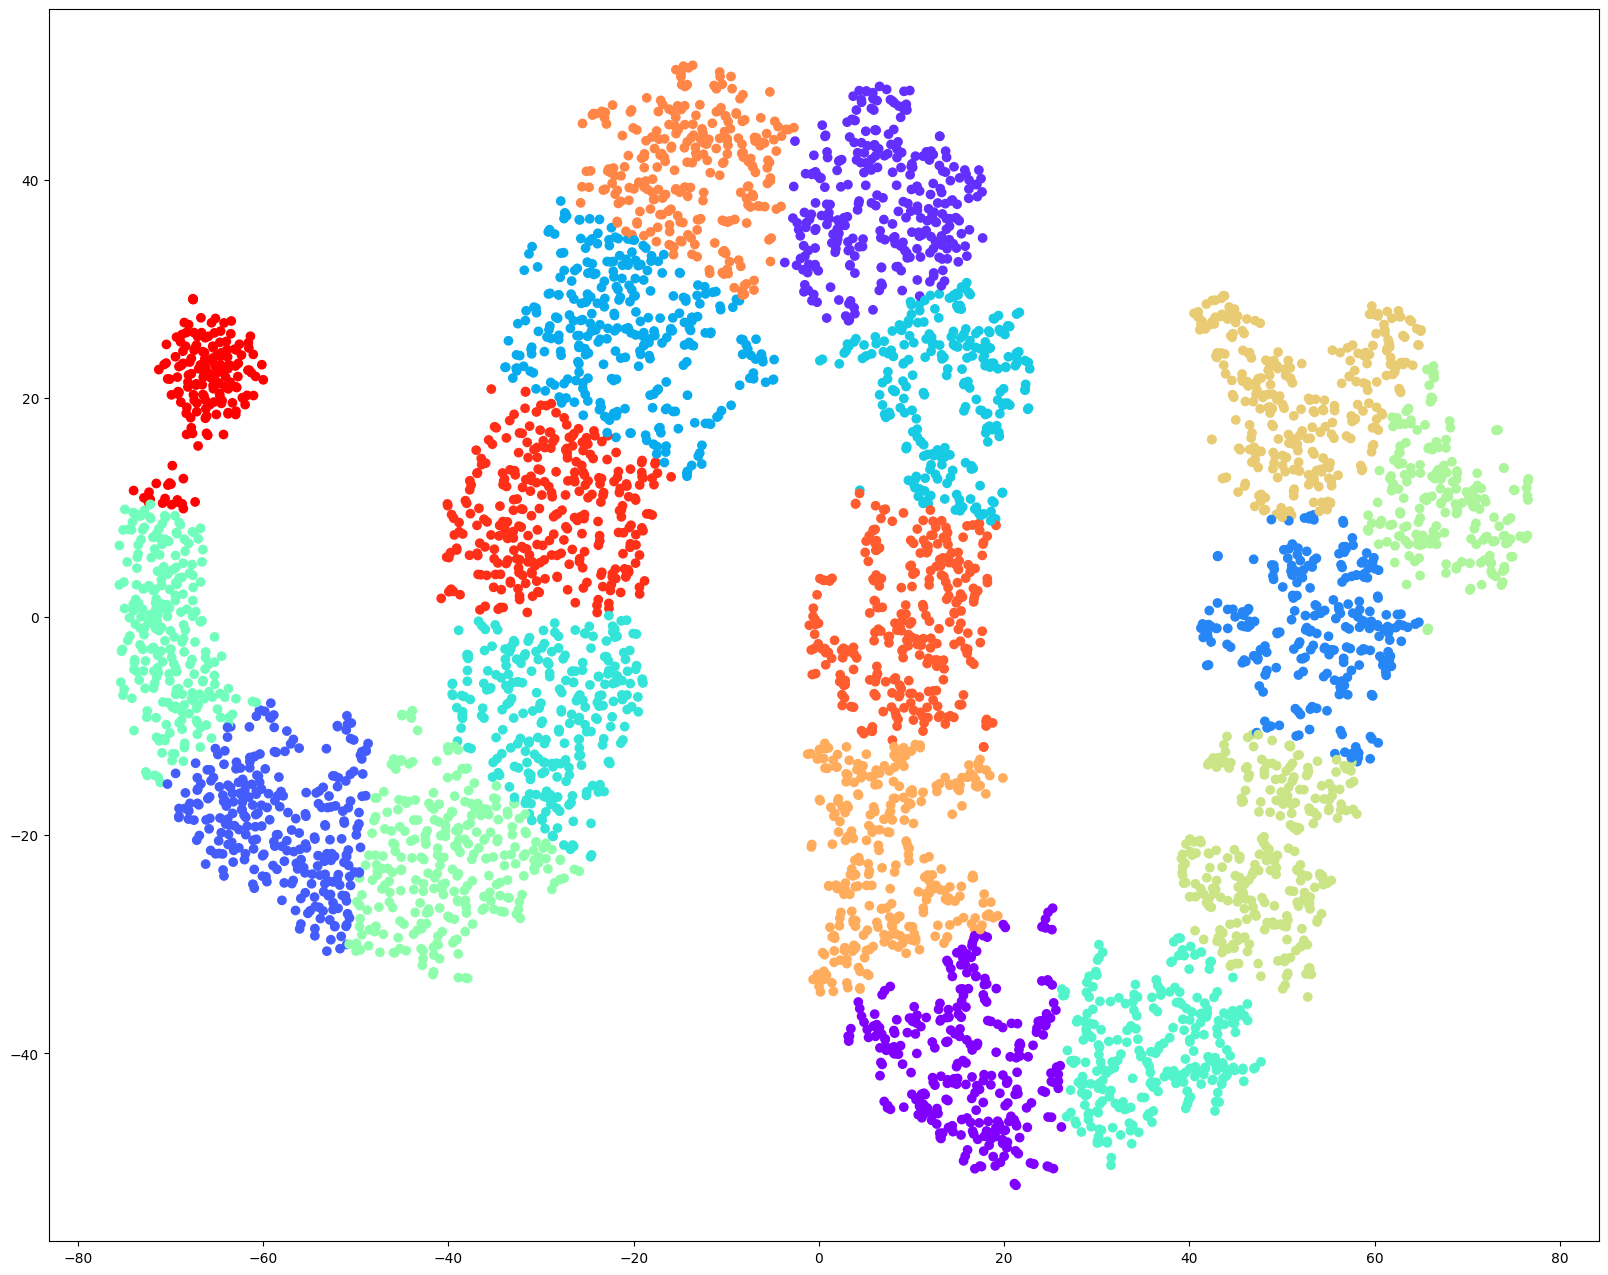

In [69]:
plot_embeddings_cluster(x_vals, y_vals, labels, 18)

In [70]:
# Implement Elbow method to find the optimal number of clusters

def elbow_method(x_vals, y_vals, words, max_n = 10):
    '''
    Plot the elbow method to find the optimal number of clusters

    ## Params:
        
    '''

    X = x_vals
    Y = y_vals
    
    d= {'X' : X, 'Y' : Y}
    df = pd.DataFrame(data = d)
    sse = []
    list_k = list(range(1, max_n))
    for k in list_k:
        km = KMeans(n_clusters=k)
        km.fit(df)
        sse.append(km.inertia_)
    plt.figure(figsize=(6, 6))
    plt.plot(list_k, sse, '-o')
    plt.xlabel('Number of clusters *k*')
    plt.ylabel('Sum of squared distance')



In [71]:
# Use the elbow method to find the optimal number of clusters

elbow_method(x_vals, y_vals, labels, 20)

NameError: name 'df' is not defined